In [ ]:
from os import replace
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/titanic_disaster.csv')

In [ ]:
#1
def load_data():
  return pd.read_csv('/content/titanic_disaster.csv')
print(load_data().head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

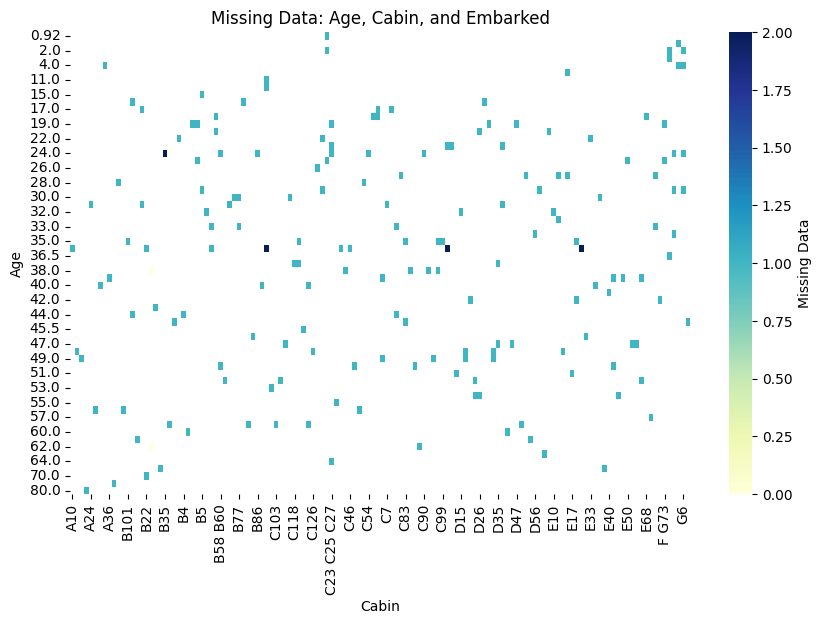

In [ ]:
#2
plt.figure(figsize=(10, 6))
data=df.pivot_table(index='Age', columns='Cabin', values='Embarked', aggfunc='count')
sns.heatmap(data, cmap='YlGnBu', cbar_kws={'label': 'Missing Data'})
plt.title('Missing Data: Age, Cabin, and Embarked')
plt.show()

In [ ]:
#3
df[['FirstName', 'secondName']] = df['Name'].str.split(',',expand=True)
df= df.drop('Name', axis=1)
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  FirstName  \
0         A/5 21171   7.2500   NaN        S     Braund   
1          PC 17599  71.2833   C85        C    Cumings   
2  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3            113803  53.1000  C123        S   Futrelle   
4            373450   8.0500   NaN        S      Allen   

                                    secondName  
0                              Mr. Owen Harris  
1   Mrs. John Bradley (Florence Briggs Thayer)  
2                                  Miss. Laina  
3           Mrs. Jacques Heath (Lily May Peel)  
4                    

In [ ]:
#4
df['Sex'] =df['Sex'].replace({'male': 'M', 'female': "F"})
print(df.head())

   PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3   M  22.0      1      0         A/5 21171   
1            2         1       1   F  38.0      1      0          PC 17599   
2            3         1       3   F  26.0      0      0  STON/O2. 3101282   
3            4         1       1   F  35.0      1      0            113803   
4            5         0       3   M  35.0      0      0            373450   

      Fare Cabin Embarked  FirstName  \
0   7.2500   NaN        S     Braund   
1  71.2833   C85        C    Cumings   
2   7.9250   NaN        S  Heikkinen   
3  53.1000  C123        S   Futrelle   
4   8.0500   NaN        S      Allen   

                                    secondName  
0                              Mr. Owen Harris  
1   Mrs. John Bradley (Florence Briggs Thayer)  
2                                  Miss. Laina  
3           Mrs. Jacques Heath (Lily May Peel)  
4                            Mr. William Henr

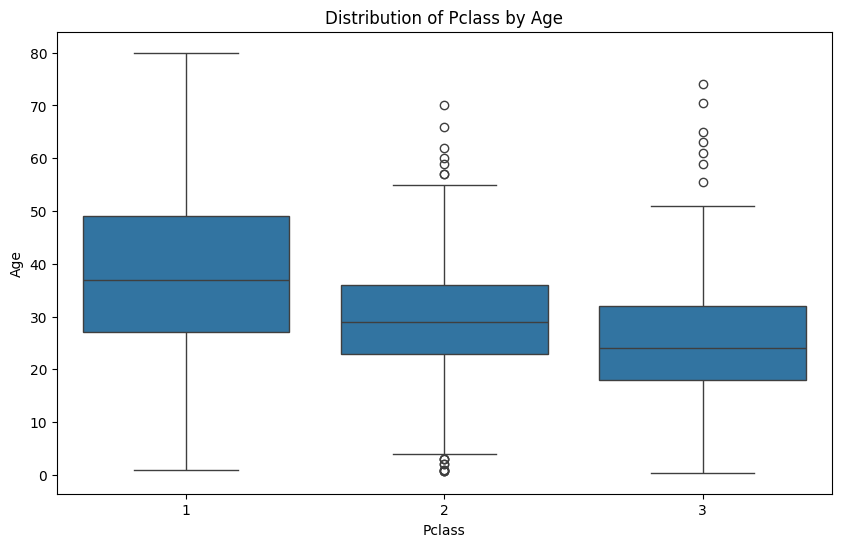

0     22.00000
1     38.00000
2     26.00000
3     35.00000
4     35.00000
5     19.86532
6     54.00000
7      2.00000
8     27.00000
9     14.00000
10     4.00000
11    58.00000
12    20.00000
13    39.00000
14    14.00000
15    55.00000
16     2.00000
17    19.86532
18    31.00000
19    19.86532
Name: Age, dtype: float64


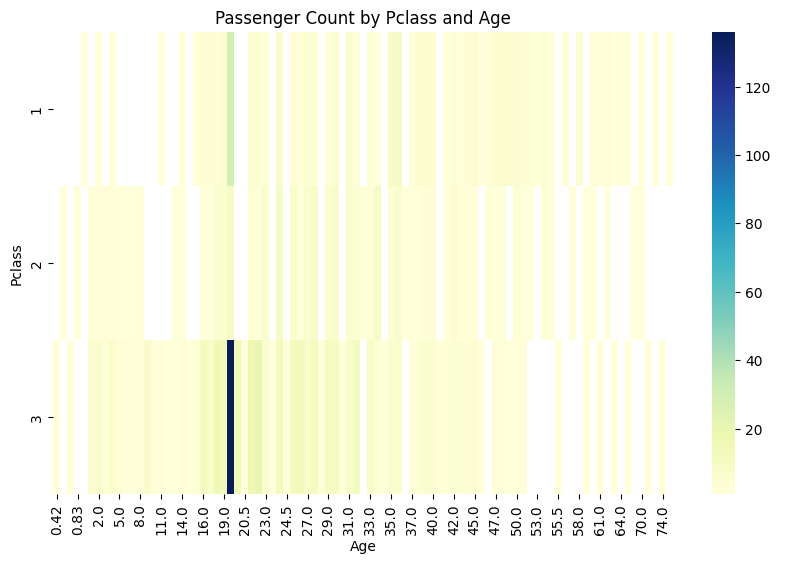

In [ ]:
#5
#a
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Distribution of Pclass by Age')
plt.show()

#b
df['Age'].fillna(df['Age'].isnull().mean()*100, inplace=True)
print(df['Age'].head(20))

plt.figure(figsize=(10, 6))
sns.heatmap(data=df.pivot_table(index='Pclass', columns='Age', aggfunc='size'), cmap='YlGnBu', cbar_kws={'label': ' '})
plt.title('Passenger Count by Pclass and Age')
plt.show()

In [ ]:
#6
# Chia dữ liệu thành các nhóm độ tuổi
bins = [0, 12, 18, 59 ,60]
labels = ['Kid', 'Teen', 'Adult', 'Older']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
print(df['Age Group'].head(20))


0     Adult
1     Adult
2     Adult
3     Adult
4     Adult
5     Adult
6     Adult
7       Kid
8     Adult
9      Teen
10      Kid
11    Adult
12    Adult
13    Adult
14     Teen
15    Adult
16      Kid
17    Adult
18    Adult
19    Adult
Name: Age Group, dtype: category
Categories (4, object): ['Kid' < 'Teen' < 'Adult' < 'Older']


In [ ]:
#7
df['namePrefix'] = df['secondName'].apply(lambda x: x.split('.')[0].strip())
df['secondName'] = df['secondName'].str.replace('Mrs.', '').str.replace('Miss.', '').str.replace('Mr.', '')
print(df[['secondName', 'namePrefix']].head(10))

                                secondName namePrefix
0                              Owen Harris         Mr
1    John Bradley (Florence Briggs Thayer)        Mrs
2                                    Laina       Miss
3            Jacques Heath (Lily May Peel)        Mrs
4                            William Henry         Mr
5                                    James         Mr
6                                Timothy J         Mr
7                    Master. Gosta Leonard     Master
8      Oscar W (Elisabeth Vilhelmina Berg)        Mrs
9                   Nicholas (Adele Achem)        Mrs


In [ ]:
#8
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df['FamilySize'].head(10))

0    2
1    2
2    1
3    2
4    1
5    1
6    1
7    5
8    3
9    2
Name: FamilySize, dtype: int64


In [ ]:
#9
df['Alone']= np.where(df['FamilySize'] == 1, 1, 0)
print(df['Alone'].head(10))

0    0
1    0
2    1
3    0
4    1
5    1
6    1
7    0
8    0
9    0
Name: Alone, dtype: int64


In [ ]:
#10
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Cabin'] = df['Cabin'].str[0]
print(df['Cabin'].head(10))

0    U
1    C
2    U
3    C
4    U
5    U
6    E
7    U
8    U
9    U
Name: Cabin, dtype: object


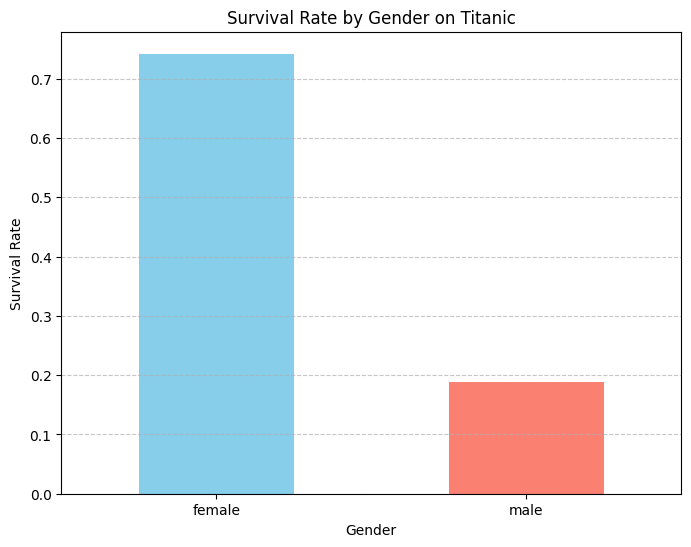

In [ ]:
#Phần 2
#12
plt.figure(figsize=(8, 6))
ax = df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['skyblue', 'salmon'])
ax.set_xlabel('Gender')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Gender on Titanic')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


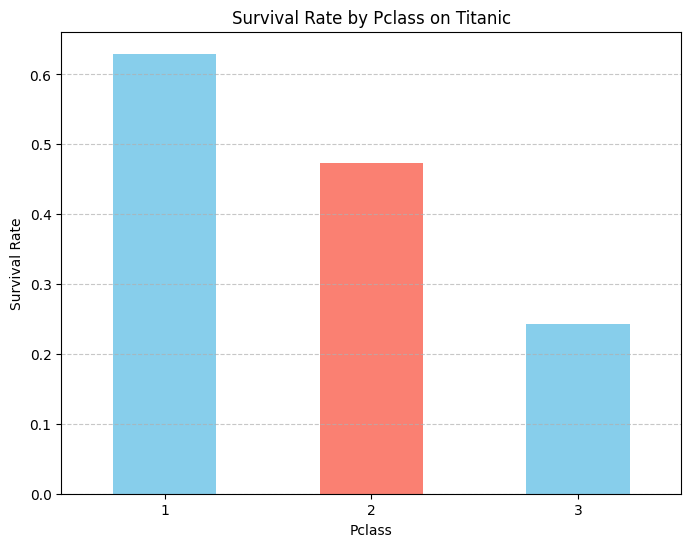

In [ ]:
#13
plt.figure(figsize=(8, 6))
ax = df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color=['skyblue', 'salmon'])
ax.set_xlabel('Pclass')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Pclass on Titanic')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

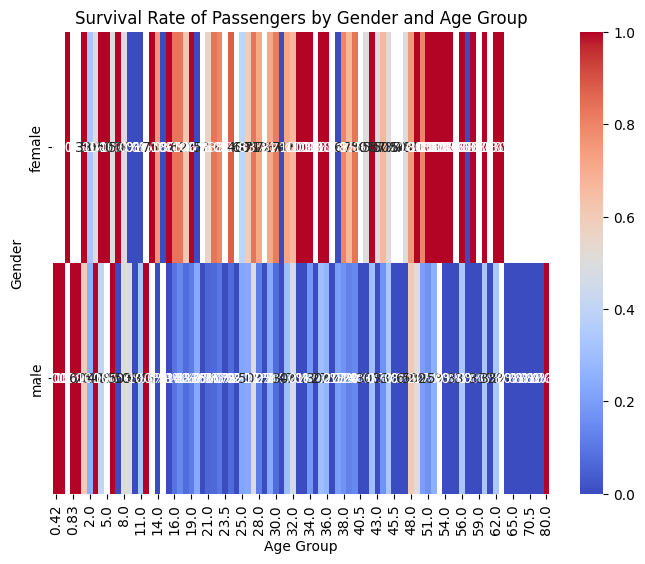

In [ ]:
#14
heatmap_data = df.pivot_table(index='Sex', columns='Age', values='Survived')
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".0%")
plt.title('Survival Rate of Passengers by Gender and Age Group')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

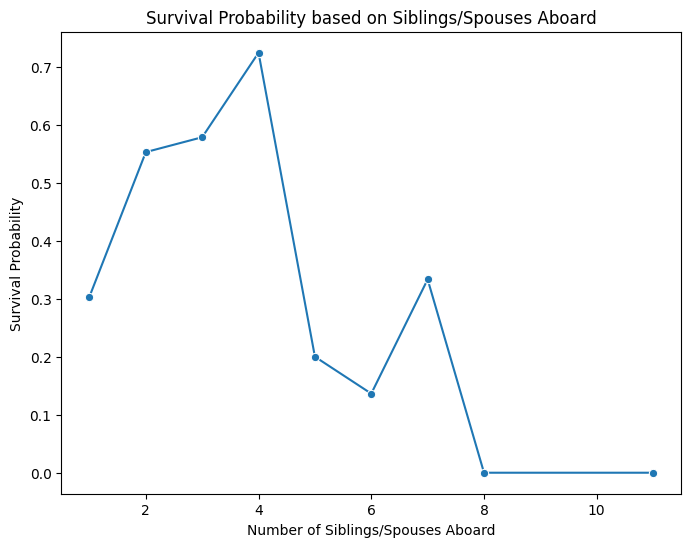

In [ ]:
#15
survival_rate = df.groupby('FamilySize')['Survived'].mean().reset_index()
# Create the line chart
plt.figure(figsize=(8, 6))
sns.lineplot(x='FamilySize', y='Survived', data=survival_rate, marker='o')
plt.title('Survival Probability based on Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Probability')
plt.show()

<ipython-input-21-903e60af4435>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fare', y='Survived', data=survival_rate, palette='viridis')


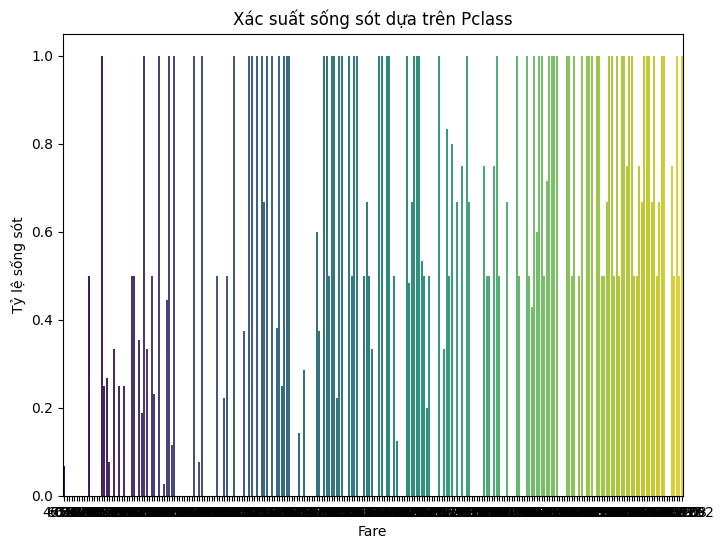

In [ ]:
#16
survival_rate = df.groupby('Fare')['Survived'].mean().reset_index()
# Tạo biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x='Fare', y='Survived', data=survival_rate, palette='viridis')
plt.title('Xác suất sống sót dựa trên Pclass')
plt.xlabel('Fare')
plt.ylabel('Tỷ lệ sống sót')
plt.show()

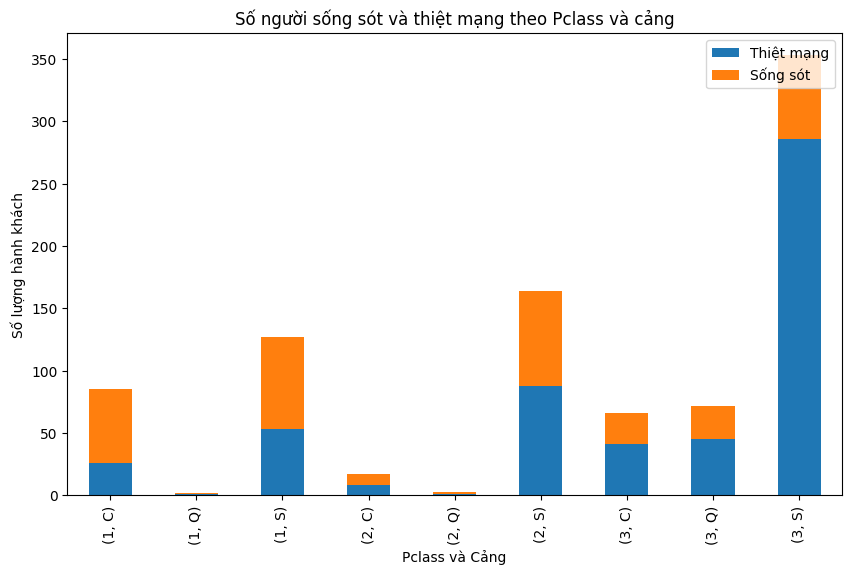

In [ ]:
#17
survival_counts = df.groupby(['Pclass', 'Embarked', 'Survived']).size().unstack()
survival_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Số người sống sót và thiệt mạng theo Pclass và cảng')
plt.xlabel('Pclass và Cảng')
plt.ylabel('Số lượng hành khách')
plt.legend(['Thiệt mạng', 'Sống sót'], loc='upper right')
plt.show()